In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# pd.set_option("plotting.backend", "hvplot")
# pd.options.mode.chained_assignment = None
plt.figure(figsize = (10, 10))

sns.set(style="whitegrid")

<Figure size 720x720 with 0 Axes>

In [3]:
without_similarities = pd.read_csv('results/without_similarity_matrix.csv')
without_similarities.drop(columns=['Unnamed: 0'], inplace=True)
without_similarities = without_similarities.values
without_similarities

array([[1.97101247, 1.97101247, 1.97101247, ..., 3.82874012, 3.22839284,
        3.22839284],
       [1.81053269, 1.81053269, 1.81053269, ..., 3.68756509, 3.08106327,
        3.08106327],
       [1.96924293, 1.96924293, 1.96924293, ..., 3.81185722, 3.21250081,
        3.21250081],
       ...,
       [2.0985353 , 2.0985353 , 2.0985353 , ..., 4.03281069, 3.44671941,
        3.44671941],
       [2.15873027, 2.15873027, 2.15873027, ..., 4.12976789, 3.61444998,
        3.61444998],
       [2.01221871, 2.01221871, 2.01221871, ..., 3.95901155, 3.37213564,
        3.37213564]])

In [4]:
with_similarities = pd.read_csv('results/batch 0.csv')
with_similarities.drop(columns=['Unnamed: 0'], inplace=True)
with_similarities = with_similarities.values
with_similarities

array([[6.12840986, 6.12840986, 6.12840986, ..., 6.03129101, 4.83788919,
        4.83788919],
       [6.2183466 , 6.2183466 , 6.2183466 , ..., 6.07799053, 4.91855526,
        4.91855526],
       [6.12499952, 6.12499952, 6.12499952, ..., 6.01277018, 4.83294678,
        4.83294678],
       ...,
       [6.0795517 , 6.0795517 , 6.0795517 , ..., 5.98538017, 4.78033018,
        4.78033018],
       [6.29605341, 6.29605341, 6.29605341, ..., 6.11987877, 4.99074888,
        4.99074888],
       [6.32037067, 6.32037067, 6.32037067, ..., 6.1486578 , 5.01822042,
        5.01822042]])

In [5]:
# similarities = pd.read_csv('results/batch 0.csv')
# similarities.drop(columns=['Unnamed: 0'], inplace=True)
# similarities = similarities.values
# similarities

In [6]:
train = pd.read_csv('data/twitter_train_translated.csv')
test = pd.read_csv('data/twitter_test_translated.csv')
test.head()

Unnamed: 0                  id  \
0       12738  665333038944002048   
1       12739  665324167785410560   
2       12740  665333370205765632   
3       12741  665326188735295489   
4       12742  665389341141659648   

                                                text                image  \
0  sadness # bataclan sold out musicians public i...  attacks_paris_1.jpg   
1  rt user # last hour spectacular photograph tak...  attacks_paris_1.jpg   
2  rt user # bataclan tonight before the url attacks  attacks_paris_1.jpg   
3  rt user man has to establish an end for the wa...  attacks_paris_1.jpg   
4                                        # paris url  attacks_paris_1.jpg   

  label  
0  fake  
1  fake  
2  fake  
3  fake  
4  fake

In [7]:
data = test

### Without similarity calculation

In [8]:
np.max(without_similarities), np.min(without_similarities), np.mean(without_similarities)

(9.631244659423828, -10.282122611999512, 0.22026454079786126)

In [9]:
without_normalized = (without_similarities - np.min(without_similarities)) / (np.max(without_similarities) - np.min(without_similarities))

In [10]:
np.max(without_normalized), np.min(without_normalized), np.mean(without_normalized)

(1.0, 0.0, 0.5274038794970056)

In [11]:
without_diameter = np.diagonal(without_normalized)


In [12]:
without_diameter.mean()

0.5272736055433571

In [13]:
without_diameter[data['label']=='real'].mean()

0.40070086539821037

In [14]:
without_diameter[data['label']=='fake'].mean()

0.6303897461386694

### With similarity calculation

In [15]:
np.max(with_similarities), np.min(with_similarities), np.mean(with_similarities)

(7.957752704620361, 4.0716896057128915, 5.324145657606938)

In [16]:
with_normalized = (with_similarities - np.min(with_similarities)) / (np.max(with_similarities) - np.min(with_similarities))

In [17]:
np.max(with_normalized), np.min(with_normalized), np.mean(with_normalized)

(1.0, 0.0, 0.32229431690035176)

In [18]:
with_diameter = np.diagonal(with_normalized)


In [19]:
with_diameter.mean()

0.3254251913685233

In [20]:
with_diameter[data['label']=='real'].mean()

0.3067557027146469

In [21]:
with_diameter[data['label']=='fake'].mean()

0.3406348298314979

In [22]:
# data = pd.concat((train, test))
data = test

<AxesSubplot:>

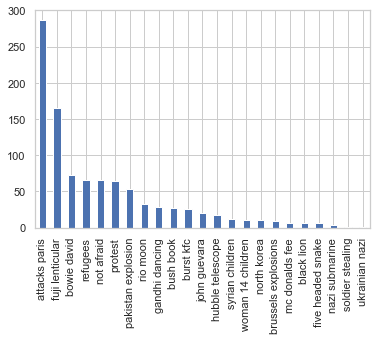

In [23]:
data['event'] = data.image.apply(lambda x: " ".join(x.split('.')[0].split('_')[:-1]).replace('fake', '').replace('real', '').strip())
data.event.value_counts().plot.bar()



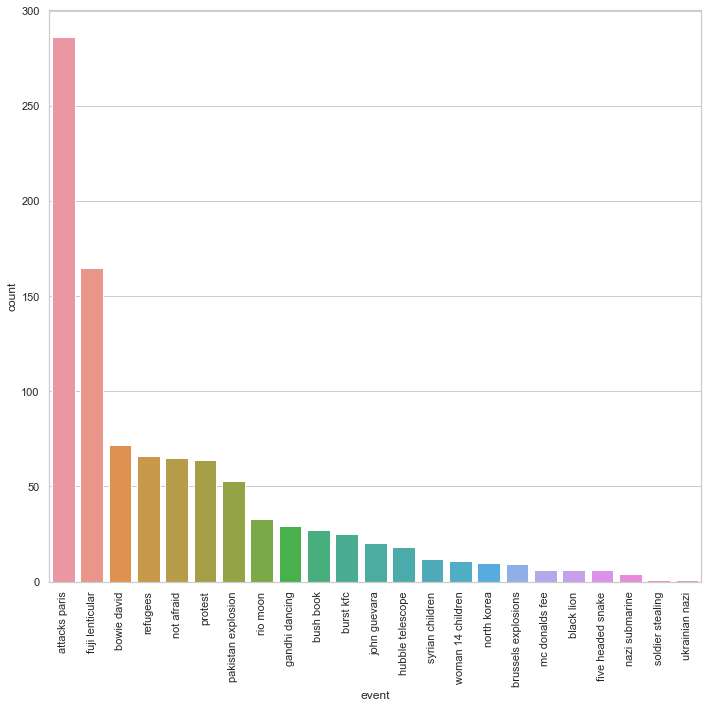

In [24]:
plt.figure(figsize = (10, 10))
sns.countplot(x='event', data=data, order=data.event.value_counts().index)
plt.xticks(rotation=90)
plt.tight_layout()

In [25]:
cross_tab = pd.crosstab(index=data['event'], columns=data['label'])
# cross_tab['sum'] = cross_tab.apply(lambda x: x.fake+x.real, axis=1)
# cross_tab['fake'] = cross_tab.apply(lambda x: x.fake/x['sum'], axis=1)
# cross_tab['real'] = cross_tab.apply(lambda x: x.real/x['sum'], axis=1)

# cross_tab['fake'] = cross_tab.apply(lambda x: int(x.fake), axis=1)
# cross_tab['real'] = cross_tab.apply(lambda x: int(x.real), axis=1)
cross_tab = cross_tab[['fake', 'real']]
plt.figure(figsize=(20, 20))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=2)
# heatmap = sns.heatmap(cross_tab, annot=True)
# # heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
# plt.show()


<Figure size 1440x1440 with 0 Axes>

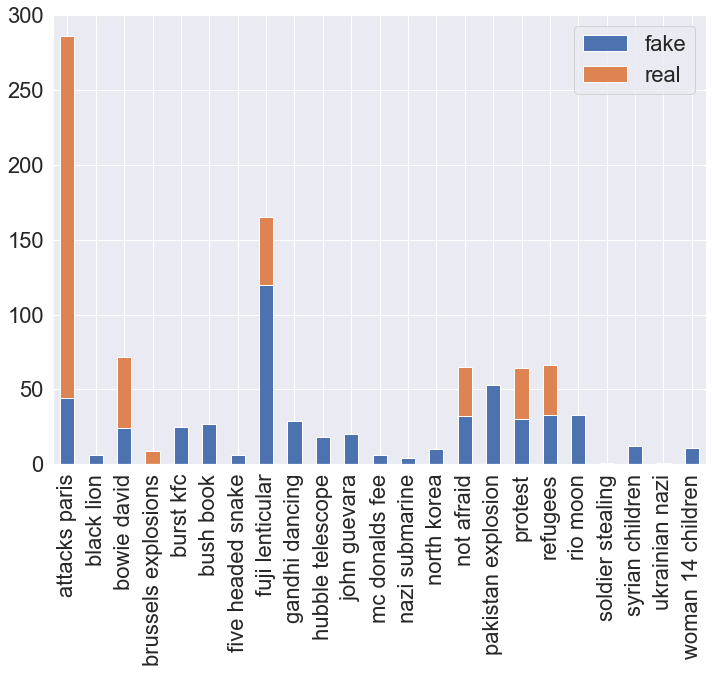

In [26]:

c = cross_tab.plot(kind='bar', stacked=True)
c.set(xlabel=None)
c.set(ylabel=None)
c.legend_.set_title(None)
plt.show()

In [27]:
events = data.event.unique()
events

array(['attacks paris', 'black lion', 'bowie david',
       'brussels explosions', 'burst kfc', 'bush book',
       'five headed snake', 'fuji lenticular', 'gandhi dancing',
       'hubble telescope', 'john guevara', 'mc donalds fee',
       'nazi submarine', 'north korea', 'not afraid',
       'pakistan explosion', 'protest', 'refugees', 'rio moon',
       'soldier stealing', 'syrian children', 'ukrainian nazi',
       'woman 14 children'], dtype=object)

In [28]:
# names = ['Only image', 'Only text', 'Text & Image without Similarity', 'Text & Image with Similarity']
# accuracies = [0.68, 0.81, 0.869, 0.879]
# f1s = [0.68, 0.81, 0.869, 0.879]
# aus = [0.72, 0.83, 0.898, 0.938]

# twitter = pd.DataFrame({'name':names, 'accuracy': accuracies, 'f1-score micro':f1s, 'AUC':aus})
# twitter = pd.melt(twitter, id_vars="name", var_name="metric", value_name="number")
# twitter

# # g = sns.barplot(x, hue='name', data=twitter)
# # sns.set(rc={'figure.figsize':(11,8)})

In [29]:
# p = sns.barplot(x="metric", y="number", hue="name", ci=None, data=twitter)
# p.set(xlabel=None)
# p.set(ylabel=None)
# p.legend_.set_title(None)
# sns.set_palette("tab20")
# plt.legend(loc='lower right')
# plt.show()

In [30]:
without_means = list()

for event in events:
    d1 = data.event == event
    m = list()
    for event_ in events:
        d2 = data.event == event_
        m.append(np.mean(without_normalized[d1,:][:,d2]))
    without_means.append(np.array(m))
without_means = np.array(without_means)
without_means.shape

(23, 23)

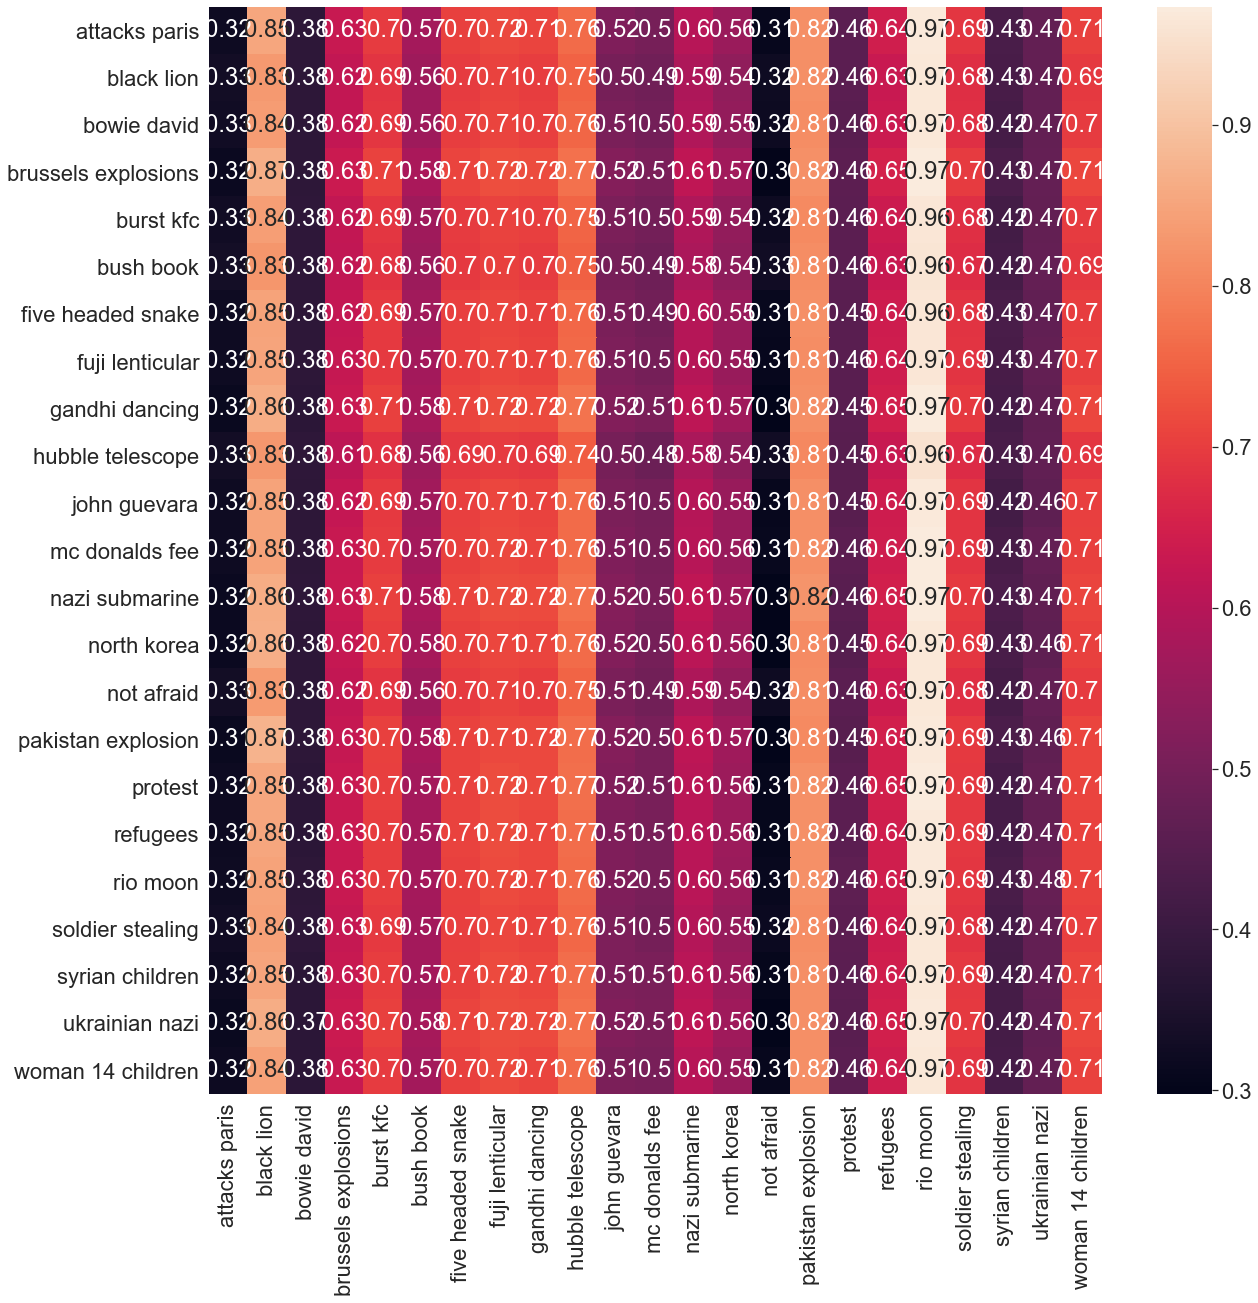

In [31]:

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(without_means, annot=True, xticklabels=events, yticklabels=events)
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
sns.set(font_scale=1.25)
plt.show()

In [32]:
without_means.diagonal().mean()

0.6070646237133083

In [33]:
without_means.diagonal().var()

0.02667994976560363

In [34]:
without_means.mean()

0.6077117139290742

In [35]:
without_means.var()

0.02755410530676937

In [36]:
n = (without_means.shape[0]*without_means.shape[1] - without_means.diagonal().shape[0])/2
n

253.0

In [37]:
def distance_calculator(m):
    distance = 0
    length = 0
    for i, row in enumerate(m):
#         print(row)
        for j, column in enumerate(m[i+1:]):
#             print(column)
            distance += column - row if column - row > 0 else row - column
            length += 1
    return distance / length
    

In [38]:
distance_calculator(without_means[np.triu_indices(23, k = 1)])

0.18582239973717557

### With similarity

In [39]:
with_means = list()

for event in events:
    d1 = data.event == event
    m = list()
    for event_ in events:
        d2 = data.event == event_
        m.append(np.mean(with_normalized[d1,:][:,d2]))
    with_means.append(np.array(m))
with_means = np.array(with_means)
with_means.shape

(23, 23)

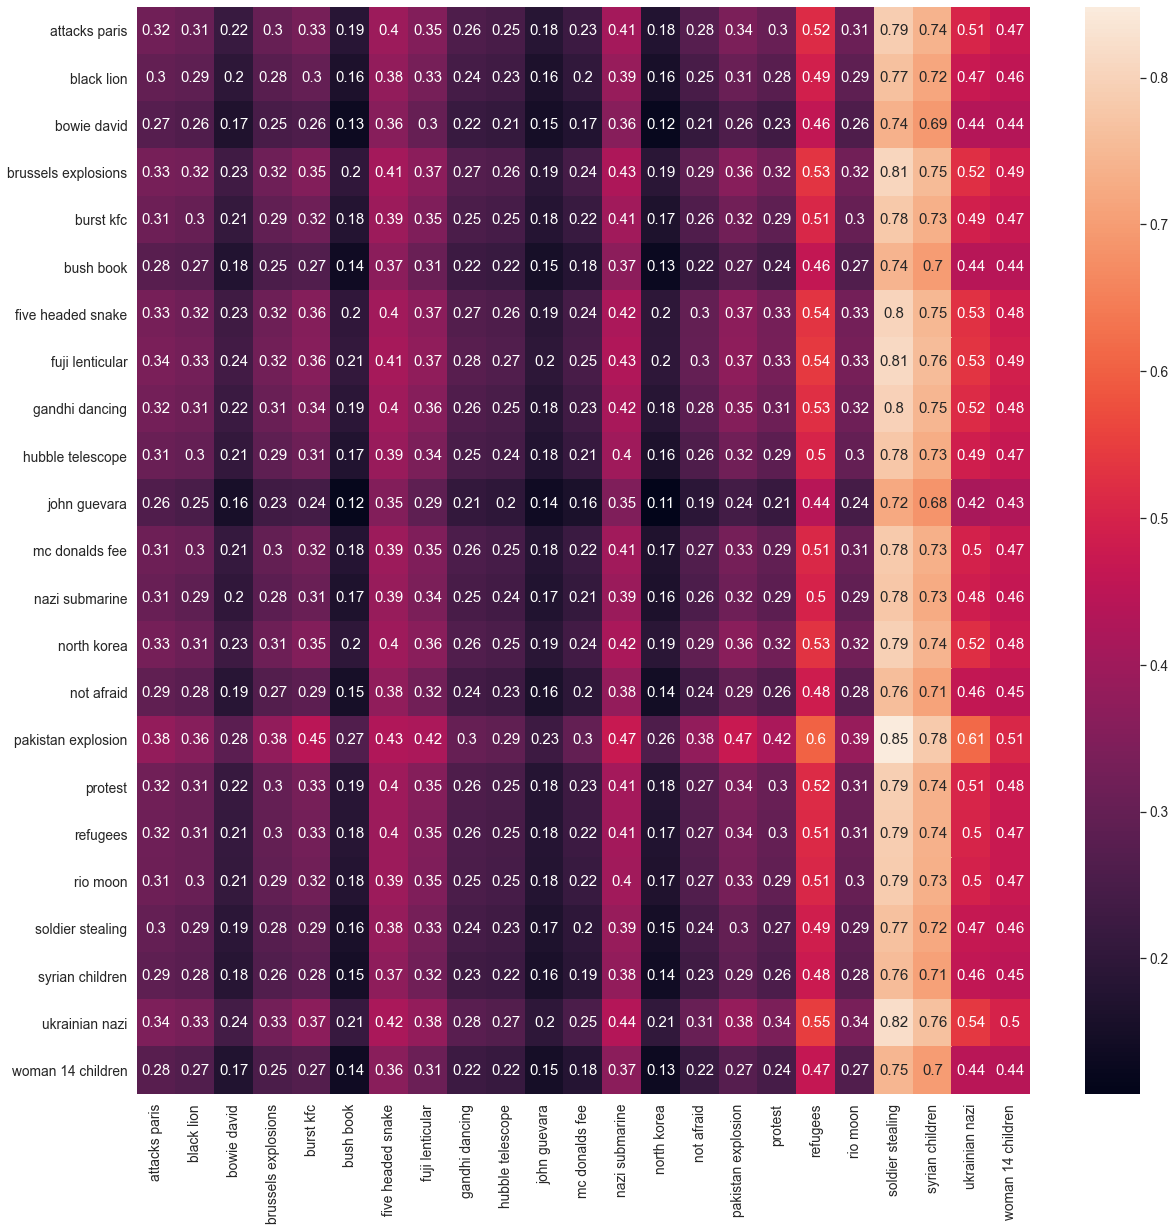

In [40]:

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(with_means, annot=True, xticklabels=events, yticklabels=events)
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
sns.set(font_scale=1.25)
plt.show()

In [41]:
with_means.diagonal().mean()

0.3505192691173016

In [42]:
with_means.diagonal().var()

0.026153930777233107

In [43]:
with_means.mean()

0.3463002924636721

In [44]:
with_means.var()

0.02562625887231725

In [45]:
distance_calculator(with_means[np.triu_indices(23, k = 1)])

0.20782937582052868